# 3. Explore the Data

> "I don't know, what I don't know"

- Why do **visual exploration**?
- Understand Data Structure & Types
- Explore **single variable graphs** - Quantitative, Categorical
- Explore **dual variable graphs** - (Q & Q, Q & C, C & C)
- Explore **multi variable graphs**

In [1]:
# Import the two library we need, which is Pandas and Numpy
import pandas as pd
import numpy as np

In [3]:
#Read the csv file of 
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

In [25]:
#Set the Index
df.index = pd.PeriodIndex(df.Date, freq='M')
df = df.sort_index()

Lets load the libraries required for Visual Exploration

In [12]:
# Load the visualisation libraries - Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

## Quantiative Variable - Single Variable

In [26]:
df.head()

,Market,Month Name,Year,Arrival (q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q),State,Mandi,Date
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,January-1996
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,February-1996
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,March-1996
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,April-1996
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,May-1996


In [27]:
df_bang = df[df["Mandi"] == "BANGALORE"]
df_bang.head()

,Market,Month Name,Year,Arrival (q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q),State,Mandi,Date
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,January-2004
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,February-2004
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,March-2004
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,April-2004
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,May-2004


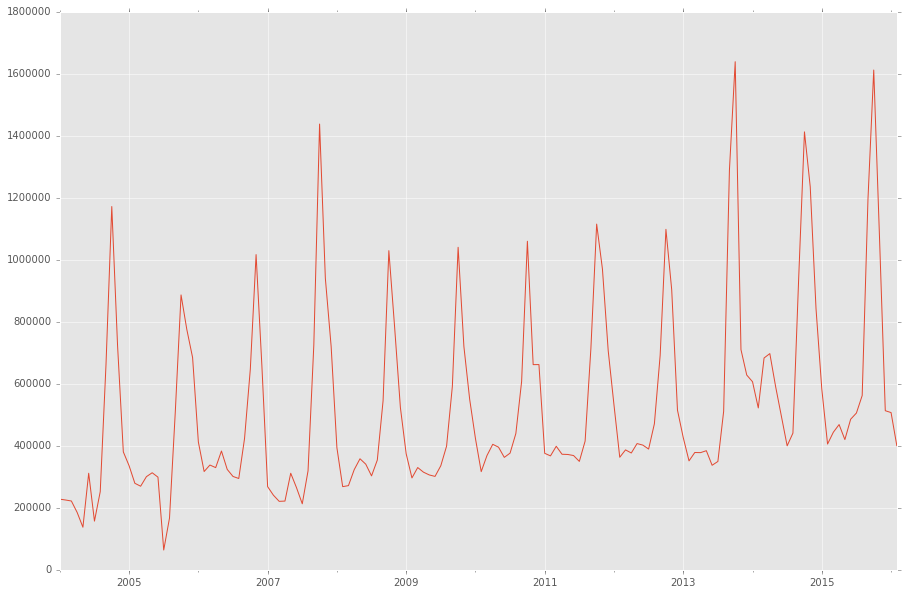

In [29]:
df_bang['Arrival (q)'].plot()

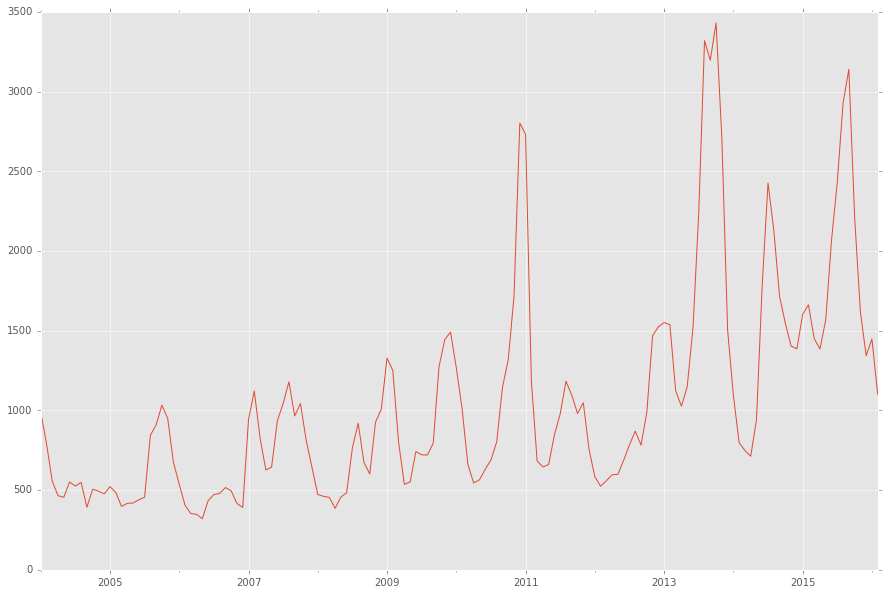

In [32]:
df_bang['Modal Price (Rs/q)'].plot()

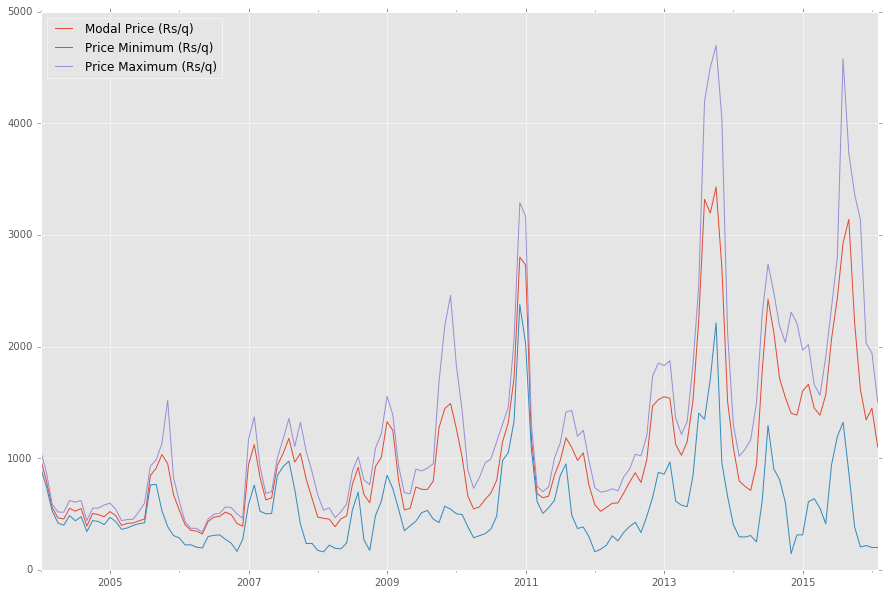

In [35]:
df_bang[['Modal Price (Rs/q)', 'Price Minimum (Rs/q)', 'Price Maximum (Rs/q)']].plot()